# Assignment – Model Selection
Do the following on titanic dataset
1. Load the dataset into python environment
2. Do all the necessary pre-processing steps
3. Create kNN and SVM models
4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_dataset.csv')

___
# EDA

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

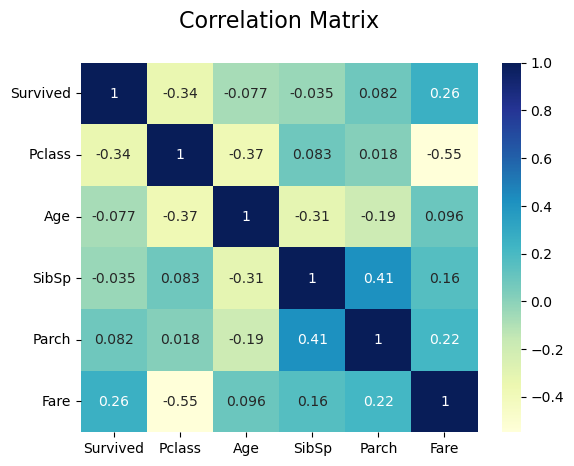

In [8]:
sns.heatmap(data.corr(numeric_only = True), cmap = 'YlGnBu', annot = True)
plt.yticks(rotation = 0)
plt.title("Correlation Matrix\n", size = 16)
plt.show()

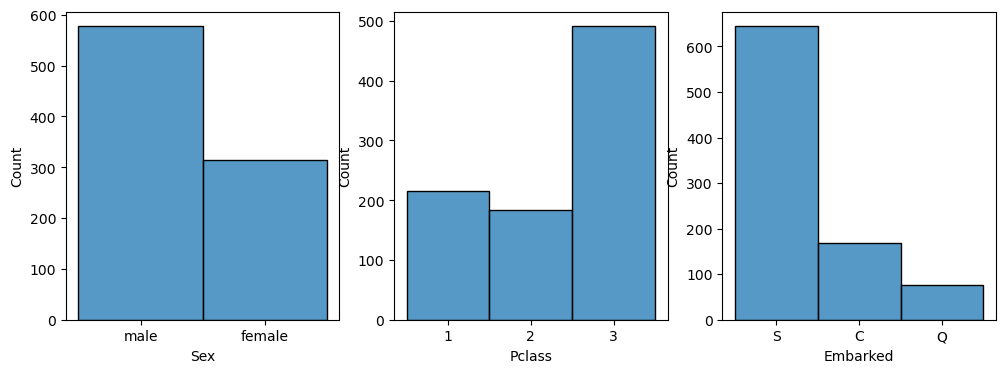

In [9]:
fig, axes = plt.subplots(1,3,figsize = (12,4))
sns.histplot(data, x = 'Sex', ax = axes[0])
sns.histplot(data, x = 'Pclass', discrete = True, ax = axes[1])
sns.histplot(data, x = 'Embarked', ax = axes[2])
plt.show()

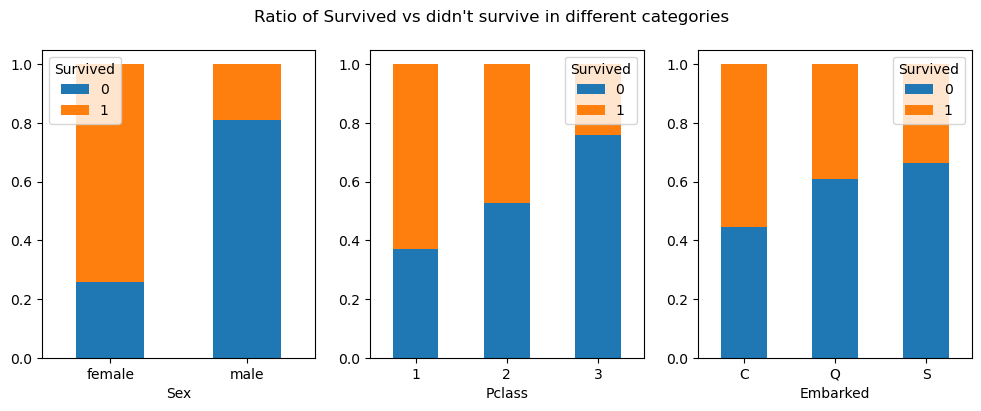

In [10]:
fig, axes = plt.subplots(1,3,figsize = (12,4))
data.groupby(by = 'Sex')['Survived'].value_counts(normalize = True).unstack('Survived').plot(kind = 'bar', stacked = True, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 0)
data.groupby(by = 'Pclass')['Survived'].value_counts(normalize = True).unstack('Survived').plot(kind = 'bar', stacked = True, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 0)
data.groupby(by = 'Embarked')['Survived'].value_counts(normalize = True).unstack('Survived').plot(kind = 'bar', stacked = True, ax = axes[2])
axes[2].tick_params(axis = 'x', rotation = 0)
plt.suptitle("Ratio of Survived vs didn't survive in different categories")
plt.show()

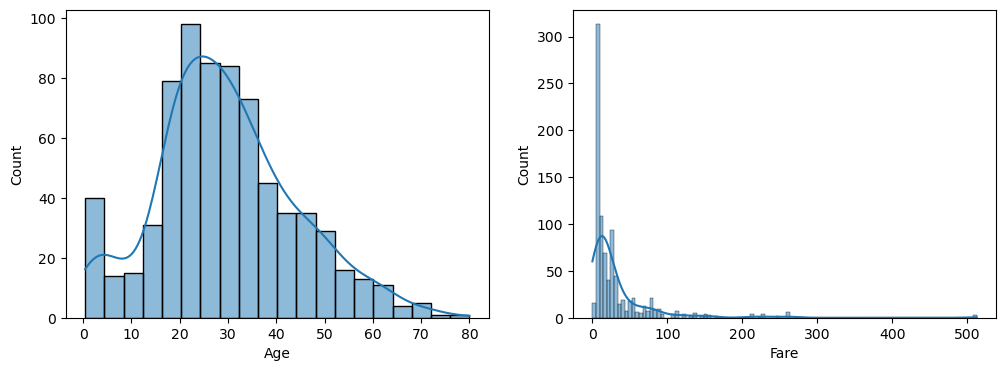

In [11]:
fig, axes = plt.subplots(1,2, figsize = (12, 4))
sns.histplot(data['Age'], kde = True, ax = axes[0])
sns.histplot(data['Fare'], kde = True, ax = axes[1])
plt.show()

## Checking for Outliers

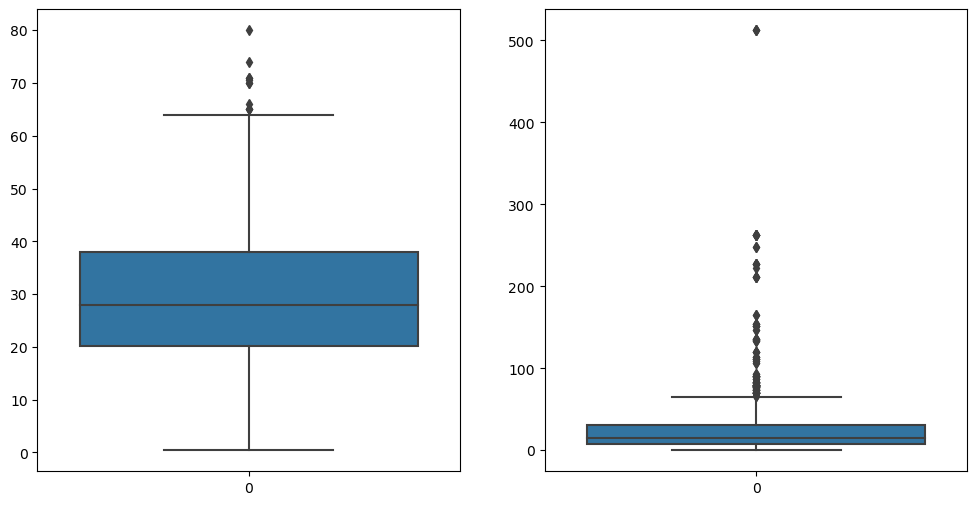

In [12]:
fig, axes = plt.subplots(1,2, figsize = (12, 6))
sns.boxplot(data['Age'], ax = axes[0])
sns.boxplot(data['Fare'], ax = axes[1])
plt.show()

### Insights
- There are more males than females
- Most people are in 3rd Class
- Most people embarked from S
- Class and Fare are correlated with Survived
- Survival rate decreases from class 1 to 3
- Survival rate is higher for Female than Male
- Both Numerical columns have outliers

## Managing Null Values

In [13]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [14]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Managing Outliers

In [15]:
for i in ['Age', 'Fare']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

## Label Encoding Sex 

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

## OneHotEncoding Embarked Column

In [17]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,65.6344,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [18]:
# Removing Embarked_S to deal with dummy variable trap
data.drop('Embarked_S', axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,65.6344,1,0
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,0
4,0,3,1,35.0,0,0,8.0500,0,0


# Scaling and splitting data

In [19]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

___
# KNN

## Checking for ideal value of K

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)
print(metric_k)

[0.7847533632286996, 0.7892376681614349, 0.7937219730941704, 0.8340807174887892, 0.8071748878923767, 0.7847533632286996, 0.7892376681614349, 0.8026905829596412, 0.8071748878923767, 0.8251121076233184, 0.820627802690583, 0.820627802690583]


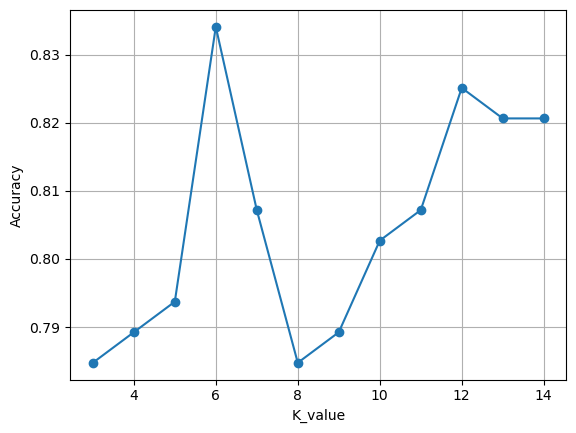

In [23]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K_value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

<b>Ideal value of k is 6</b>

## K-Fold Cross Validation

In [24]:
from sklearn.model_selection import KFold, cross_val_score
kfold_validator = KFold(10)
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
cv_score_knn = cross_val_score(knn, X, y, cv = kfold_validator)
print("CV Scores:", cv_score_knn)
print("Mean =", np.mean(cv_score_knn))
print("Range:", cv_score_knn.min(), "to", cv_score_knn.max())

CV Scores: [0.78888889 0.84269663 0.76404494 0.82022472 0.82022472 0.80898876
 0.82022472 0.76404494 0.86516854 0.79775281]
Mean = 0.8092259675405742
Range: 0.7640449438202247 to 0.8651685393258427


## Stratified K-Fold Cross Validation

In [25]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits = 10)
skfold_score_knn = cross_val_score(knn, X, y, cv = skfold)
print("CV Scores:", skfold_score_knn)
print("Mean =", np.mean(skfold_score_knn))
print("Range:", skfold_score_knn.min(), "to", skfold_score_knn.max())

CV Scores: [0.8        0.83146067 0.74157303 0.83146067 0.83146067 0.80898876
 0.84269663 0.76404494 0.83146067 0.78651685]
Mean = 0.8069662921348314
Range: 0.7415730337078652 to 0.8426966292134831


___
# SVM

## Checking which kernel gives better results

In [26]:
from sklearn.svm import SVC
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svc = SVC(kernel = i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print("Accuracy for", i, "kernel =", accuracy_score(y_test, y_pred))

Accuracy for linear kernel = 0.7847533632286996
Accuracy for poly kernel = 0.7757847533632287
Accuracy for rbf kernel = 0.820627802690583
Accuracy for sigmoid kernel = 0.7174887892376681


<b>RBF kernel has the better accuracy</b>

## K-Fold Cross Validation

In [27]:
svc = SVC(kernel = 'rbf')
cv_score_svc = cross_val_score(svc, X, y, cv = kfold_validator)
print("CV Scores:", cv_score_svc)
print("Mean =", np.mean(cv_score_svc))
print("Range:", cv_score_svc.min(), "to", cv_score_svc.max())

CV Scores: [0.81111111 0.86516854 0.78651685 0.84269663 0.82022472 0.80898876
 0.82022472 0.75280899 0.88764045 0.85393258]
Mean = 0.8249313358302123
Range: 0.7528089887640449 to 0.8876404494382022


## Stratified K-Fold Cross Validation

In [28]:
skfold_score_svc = cross_val_score(svc, X, y, cv = skfold)
print("CV Scores:", skfold_score_svc)
print("Mean =", np.mean(skfold_score_svc))
print("Range:", skfold_score_svc.min(), "to", skfold_score_svc.max())

CV Scores: [0.81111111 0.84269663 0.7752809  0.86516854 0.84269663 0.78651685
 0.84269663 0.76404494 0.86516854 0.85393258]
Mean = 0.8249313358302122
Range: 0.7640449438202247 to 0.8651685393258427


___
# Conclusion

 - KNN is giving a mean accuracies of 80.92% (K-Fold CV) and 80.69% (Stratified K-Fold CV) with number of neighbours = 6
 - SVC is giving a mean accuracy of 82.49% with RBF kernel

Therefore better model is SVC with RBF kernel